# **Extracción de características**

In [ ]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from skimage import data, img_as_float
from skimage.segmentation import chan_vese

### **Cargando la imagen**

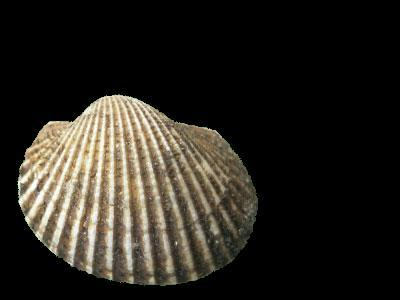

In [ ]:
img=cv2.imread("/content/drive/MyDrive/Trabajo de título/Aandara_consociata_1_A.jpg")
cv2_imshow(img)

In [ ]:
print(img.shape)

(300, 400, 3)


### **Creando la máscara mediante flood fill**
La idea es poder identificar los pixeles de color negro con el fin de etiquetar con un 0 y con un 1 si no existe el color negro dentro del pixel. 

Quedando finalmente:


*   1: En la máscara se encuentra el color blanco
*   0: En la máscara se encuentra el color negro y concuerda con el fondo de la imagen.

https://www.youtube.com/watch?v=H5xFBhdOFOM&t=784s

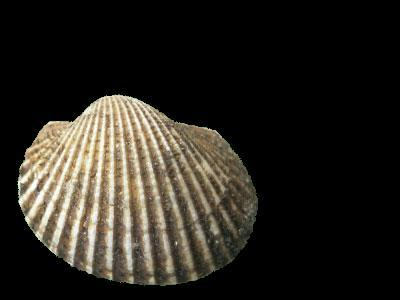

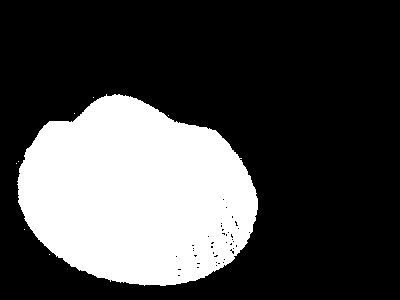

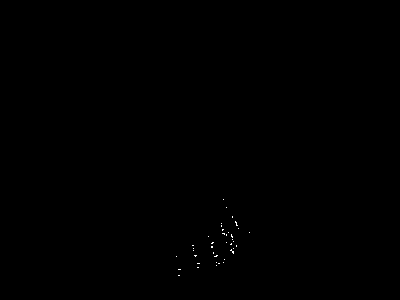

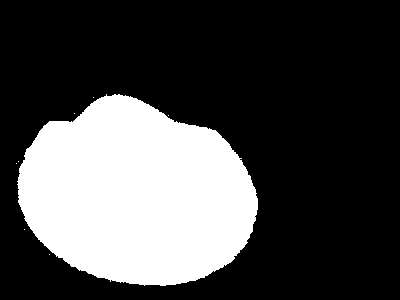

In [ ]:
# Create a copy
img2=img.copy()

# Create empty mask.
BW = np.zeros((img2.shape[0],img2.shape[1]),np.uint8)

# Flood fill
row=5
column=5

gray=cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY) #conversión a escala de grises
ret,th=cv2.threshold(gray,30,255,cv2.THRESH_BINARY_INV) #binarizado inverso
inv_th=cv2.bitwise_not(th)

th2=inv_th.copy()
h, w=th2.shape
mask = np.zeros((h+2,w+2),np.uint8)

cv2.floodFill(th2,mask,(row,column),255)
inv=cv2.bitwise_not(th2)

BW = inv_th|inv

cv2_imshow(img2) #imagen
cv2_imshow(inv_th) #binarizado
cv2_imshow(inv) 
cv2_imshow(BW) #mascara final

In [ ]:
BW.shape

(300, 400)

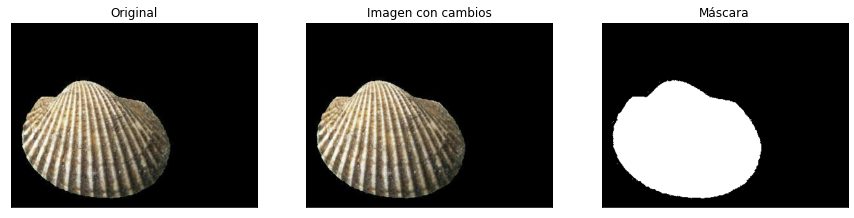

In [ ]:
imgs=[img,img2,BW]
t=['Original','Imagen con cambios','Máscara']

plt.figure(figsize=(15,6)) 
for i in range(3):
  plt.subplot(1,3,i+1)
  plt.imshow(cv2.cvtColor(imgs[i],cv2.COLOR_BGR2RGB),vmin=0,vmax=255)
  plt.title(t[i])
  plt.xticks([]),plt.yticks([])  
plt.show()

## **Color**

### **Crear histograma RGB**

Unir la máscara con la imagen para no considerar el fondo negro de la imagen. 

https://www.youtube.com/watch?v=7hhsr41ODzs

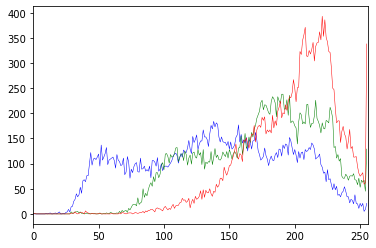

In [ ]:
color=('b','g','r')

for i, c in enumerate(color):
    hist = cv2.calcHist([img2], [i], BW, [256], [0, 256])
    plt.plot(hist, color = c,linewidth=0.5)
    plt.xlim([0,256])

plt.show()

In [ ]:
hist

## **Forma**

### **Activando contorno**
Mediante el método Chan-Vese 

https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_chan_vese.html 

https://www.youtube.com/watch?v=frJO5X5KMxs&t=87

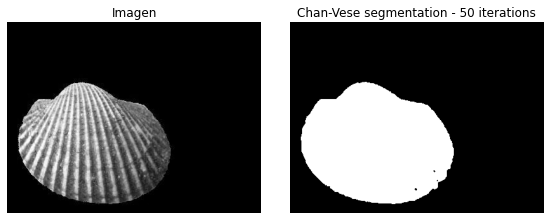

In [ ]:
cv = chan_vese(gray, mu=0.25, lambda1=1, lambda2=2, tol=1e-3,
               max_iter=50, dt=0.5, init_level_set="checkerboard",
               extended_output=True)

fig, axes = plt.subplots(1, 2, figsize=(8, 8))
ax = axes.flatten()

ax[0].imshow(gray, cmap="gray")
ax[0].set_axis_off()
ax[0].set_title("Imagen", fontsize=12)

ax[1].imshow(cv[0], cmap="gray")
ax[1].set_axis_off()
title = f'Chan-Vese segmentation - {len(cv[2])} iterations'
ax[1].set_title(title, fontsize=12)


fig.tight_layout()
plt.show()

In [ ]:
c_v = np.zeros((cv[0].shape[0],cv[0].shape[1]),np.uint8)

for i in range(cv[0].shape[0]):
  for j in range(cv[0].shape[1]):
    if cv[0][i,j]==True:
      c_v[i,j]=1
    else:
      c_v[i,j]=0

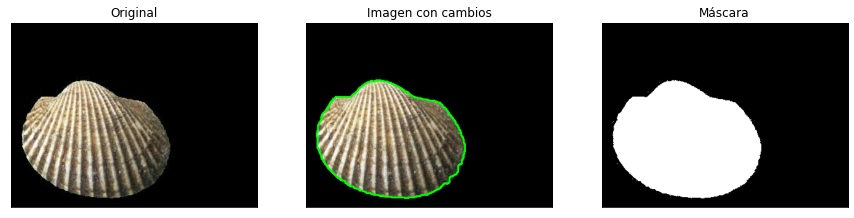

In [ ]:
contornos,jerarquia=cv2.findContours(c_v,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

cv2.drawContours(img2,contornos,-1,(0,255,0),2)

imgs=[img,img2,BW]
t=['Original','Imagen con cambios','Máscara']

plt.figure(figsize=(15,6)) 
for i in range(3):
  plt.subplot(1,3,i+1)
  plt.imshow(cv2.cvtColor(imgs[i],cv2.COLOR_BGR2RGB),vmin=0,vmax=255)
  plt.title(t[i])
  plt.xticks([]),plt.yticks([])  
plt.show()

### **Cálculo del centroide**
Con el fin de encontrar el centroide de la concha para así calcular las distancias hacia el contorno.

https://www.youtube.com/watch?v=sPGfnYuj0-Y

In [ ]:
# Momentos de una imagen → importantes M00-M10-M01
cnt=contornos[0]
M=cv2.moments(cnt)

#Cálculo del centroide
cX=int(M["m10"]/M["m00"])
cY=int(M["m01"]/M["m00"])
print(cX);print(cY)

#Dibujo del centroide
cv2.circle(img2,(cX,cY),5,(0,255,0),-1)

135
193


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

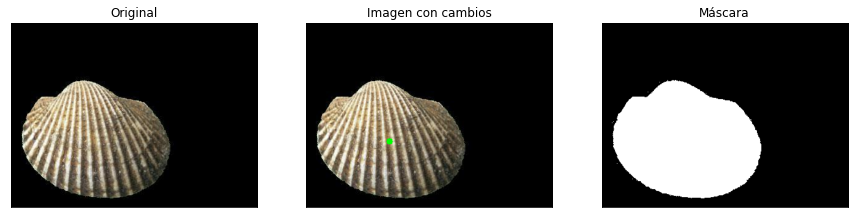

In [ ]:
imgs=[img,img2,BW]
t=['Original','Imagen con cambios','Máscara']

plt.figure(figsize=(15,6))  
for i in range(3):
  plt.subplot(1,3,i+1)
  plt.imshow(cv2.cvtColor(imgs[i],cv2.COLOR_BGR2RGB),vmin=0,vmax=255)
  plt.title(t[i])
  plt.xticks([]),plt.yticks([])  
plt.show()

### **Cálculo de distancias euclidianas**

In [ ]:
from scipy.spatial import distance


a = (cX,cY)
n=len(cnt)
angles=np.zeros(n)
distances=np.zeros(n)
for i in range(n):
  angles[i]=np.arctan((cnt[i][0][1]-cY)/(cnt[i][0][0]-cX))
  distances[i]=distance.euclidean(a,cnt[i])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in long_scalars
  if __name__ == '__main__':


In [ ]:
(cX,cY)

(114, 152)

In [ ]:
np.degrees(angles)

array([ 86.18592517,  85.27201218,  84.84441568,  84.37537196,
        83.94580811,  83.46786331,  83.41805534,  81.93306827,
        81.86989765,  81.35719742,  80.90972308,  80.76444091,
        80.2333206 ,  80.15417763,  79.61114218,  79.35078034,
        76.4462359 ,  76.32869287,  75.10130457,  74.96956948,
        73.69829166,  73.55139187,  72.89727103,  72.74104571,
        72.07208024,  71.90609346,  71.22196678,  70.49755149,
        69.77514057,  69.57766698,  64.23067238,  63.97040781,
        62.35402464,  62.07102129,  59.56576425,  59.03624347,
        58.71734632,  51.73601121,  51.34019175,  49.53777251,
        49.1181897 ,  48.20521593,  47.7702158 ,  46.84761027,
        45.47350806,  44.52649194,  43.05851361,  42.08916217,
        41.05481377,  40.07289005,  37.87498365,  36.86989765,
        32.64464013,  32.41230662,  20.05609474,  19.53665494,
        14.4702941 ,  13.81502534,   8.39292519,   7.59464337,
         2.86240523,   1.94148639,  -1.94148639,  -2.96

In [ ]:
new_angles=np.zeros(n)
for i in range(n):
  if(cnt[i][0][0]<a[0] and cnt[i][0][1]<a[1]):
    new_angles[i]=180-np.degrees(angles[i])
  if(cnt[i][0][0]<a[0] and cnt[i][0][1]>a[1]):
    new_angles[i]=180-np.degrees(angles[i])
  if(cnt[i][0][0]>a[0] and cnt[i][0][1]>a[1]):
    new_angles[i]=360-np.degrees(angles[i])
  if(cnt[i][0][0]>a[0] and cnt[i][0][1]<a[1]):
    new_angles[i]=(np.degrees(angles[i]))*(-1)
  if(cnt[i][0][0]==a[0] and cnt[i][0][1]<a[1]):
    new_angles[i]=90
  if(cnt[i][0][0]<a[0] and cnt[i][0][1]==a[1]):
    new_angles[i]=180
  if(cnt[i][0][0]==a[0] and cnt[i][0][1]>a[1]):
    new_angles[i]=270
  if(cnt[i][0][0]>a[0] and cnt[i][0][1]==a[1]):
    new_angles[i]=0

In [ ]:
angles_analysis=list(range(0, 360, 5))

In [ ]:
final_angles=np.zeros(len(angles_analysis))
for i in range(len(angles_analysis)):
  dist=np.zeros(len(new_angles))
  for j in range(len(new_angles)):
    dist[j]=abs(angles_analysis[i]-new_angles[j])
  final_angles[i]=np.argmin(dist)
final_angles

array([212., 217., 221., 227., 235., 241., 246., 250., 254., 258., 261.,
       265., 269., 273., 275., 280., 285., 290., 295., 299., 303.,   3.,
        10.,  16.,  22.,  24.,  26.,  26.,  27.,  34.,  40.,  46.,  51.,
        57.,  62.,  66.,  67.,  68.,  77.,  85.,  91.,  94.,  95.,  95.,
       100., 105., 110., 113., 115., 120., 123., 129., 132., 139., 141.,
       142., 143., 144., 146., 148., 153., 155., 160., 167., 171., 177.,
       180., 189., 191., 195., 204., 207.])

In [ ]:
final_distances=np.zeros(len(final_angles))
for i in range(len(final_angles)):
  final_distances[i]=distances[round(final_angles[i])]
final_distances

array([120.03749414, 116.43023662, 113.77170123, 110.86027242,
       109.44404963, 106.02358228, 105.67875851, 103.73041984,
        99.35793879,  91.93475948,  90.68627239,  86.02325267,
        82.85529555,  82.76472679,  85.0940656 ,  87.09190548,
        88.45903006,  92.34717104,  95.00526301,  97.41663102,
       100.62305899, 100.16985575, 102.18121158, 101.13357504,
        98.27003612,  95.8018789 ,  95.67131231,  95.67131231,
       112.92918135, 113.81124725, 113.87712676, 114.49454135,
       117.04699911, 117.88129623, 117.38824473, 118.27087554,
       117.20921465, 117.4265728 , 113.77170123, 112.08925015,
       109.20164834, 108.85311204, 102.41581909, 102.41581909,
       100.12492197,  97.59098319,  94.49338601,  94.04786016,
        93.29523032,  90.80198236,  90.47651629,  89.9888882 ,
        89.4427191 ,  89.35882721,  90.04998612,  91.08786966,
        94.11163584,  95.33624704,  96.13532129,  98.89893832,
       101.71037312, 106.25441167, 107.16809227, 111.01

## **Textura**

**Extracción de 200 parches aleatorios** 




In [ ]:
record_x=np.zeros(200)
record_y=np.zeros(200)
count_number=0
while count_number<200:
  x=random.randint(0,279) #se eliminan los ultimos 20 pixeles de abajo para que el parche no sobrepase de las dimensiones de la imagen
  y=random.randint(0,379) #se eliminan los ultimos 20 pixeles de la derecha para que el parche no sobrepase de las dimensiones de la imagen
  if BW[x,y]==255:
    n=BW[x:x+20,y:y+20]
    if((n==255).sum()==400):
      record_x[count_number]=x
      record_y[count_number]=y
      count_number+=1


In [ ]:
filtered_img.shape

(20, 20)

**Filtros de Gabor** 

https://stackoverflow.com/questions/61317974/reproduce-matlabs-imgaborfilt-in-python

In [ ]:
g_kernel = cv2.getGaborKernel((1, 1), 8.0, np.pi/2, 10.0, 0.5, 0, ktype=cv2.CV_32F)

filtered_img = cv2.filter2D(gray[round(record_x[1]):round(record_x[1])+20,round(record_y[1]):round(record_y[1])+20], cv2.CV_8UC3, g_kernel)

cv2_imshow(gray[round(record_x[1]):round(record_x[1])+20,round(record_y[1]):round(record_y[1])+20])
cv2_imshow(filtered_img)

#h, w = g_kernel.shape[:2]
#g_kernel = cv2.resize(g_kernel, (3*w, 3*h), interpolation=cv2.INTER_CUBIC)
#cv2_imshow(g_kernel)

In [ ]:
from skimage.filters import gabor
from skimage import data, io
from matplotlib import pyplot as plt  

In [ ]:
from PIL import Image, ImageEnhance
import numpy as np
from PIL import ImageFilter
import colorsys
import os
from skimage.filters import gabor, gaussian
from IPython.display import display 
from matplotlib.pyplot import imshow
from pywt import dwt2
import pickle
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
def get_image_energy(pixels):
    _, (cH, cV, cD) = dwt2(pixels.T, 'db1')
    energy = (cH ** 2 + cV ** 2 + cD ** 2).sum() / pixels.size
    return energy
  
def get_energy_density(pixels):
    energy = get_image_energy(pixels)
    energy_density = energy / (pixels.shape[0]*pixels.shape[1])
    return round(energy_density*100,5) # multiplying by 100 because the values are very small

pixels = np.asarray(n, dtype="int32")
energy_density = get_energy_density(pixels)
# get fixed bandwidth using energy density
bandwidth = abs(0.4*energy_density - 0.5)

def get_magnitude(response):
    magnitude = np.array([np.sqrt(response[0][i][j]**2+response[1][i][j]**2)
                        for i in range(len(response[0])) for j in range(len(response[0][i]))])
    return magnitude

magnitude_dict = {}
for theta in np.arange(0, np.pi, np.pi / 4):
    for freq in np.array([5,10,15,20,25]): 
        filt_real, filt_imag = gabor(n, frequency=freq, bandwidth=bandwidth, theta=theta)
        # get magnitude response
        magnitude = get_magnitude([filt_real, filt_imag])
        # im = Image.fromarray(magnitude.reshape(image_size)).convert('L')
        # display(im)
        magnitude_dict[(theta, freq)] = magnitude.reshape(n.size)

In [ ]:
import cv2
import numpy as np
import math

n=gray[round(record_x[1]):round(record_x[1])+20,round(record_y[1]):round(record_y[1])+20]
wavelength = 5
orientation = -0 / 180 * math.pi    # in radian, and seems to run in opposite direction
sigma = 0.5 * wavelength * 1         # 1 == SpatialFrequencyBandwidth
gamma = 0.5                          # SpatialAspectRatio
shape = 1 + 2 * math.ceil(4 * sigma) # smaller cutoff is possible for speed
shape = (shape, shape)
gabor_filter_real = cv2.getGaborKernel(shape, sigma, orientation, wavelength, gamma, psi=0)
gabor_filter_imag = cv2.getGaborKernel(shape, sigma, orientation, wavelength, gamma, psi=math.pi/2)

gabor = cv2.filter2D(n, -1, gabor_filter_real) + 1j * cv2.filter2D(n, -1, gabor_filter_imag)
mag = np.abs(gabor)
phase = np.angle(gabor)

In [ ]:
mag.mean()

163.6037335598331

In [ ]:
((mag**2)/mag.size).sum()

37932.837499999994

In [ ]:
(mag[0][0]/400)*math.log(mag[0][0]/400)

-0.2870031387428419

In [ ]:
suma=0
for i in range(mag.shape[0]):
  for j in range(mag.shape[1]):
    if mag[i][j] != 0:
      suma=suma + ((abs(mag[i][j]/400))*math.log(abs(mag[i][j]/400)))

In [ ]:
-suma

100.14400068544595